In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d


N_16 =16

# data for 16 site
data_16 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_19/Overlap2022_12_19_13_09_29_L16_1',delimiter=',')
z0_16 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_19/z_2022_12_19_13_09_29_L16_1',delimiter=',')
zz0_16 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_19/zz_2022_12_19_13_09_29_L16_1',delimiter=',')
zzdata_16 = zz0_16.reshape(len(z0_16),N_16,N_16)
z0_g_16 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_19/zg_2022_12_19_13_09_29_L16_1',delimiter=',')
zz0_g_16=  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_19/zzg_2022_12_19_13_09_29_L16_1',delimiter=',')
zzdata_g_16 = zz0_g_16.reshape(len(z0_g_16),N_16,N_16)

In [2]:
eta = 0.004;
eps = 0.06;
epsp = 0.04;
def n_c(n):
    corrected_measure_vals = eta * eps + (1 - eta) * (eps * (1 - n) + (1 - epsp + eps * epsp) * n)
    return corrected_measure_vals

In [3]:
# crit_t = 5.895
# crit_id0 = np.argmin(abs(data[0]-crit_t))
crit_det = 1.575
crit_id0 = np.argmin(abs(data_16[1]-crit_det))
#print(crit_id0)
print('crit time(us) = %3f'%data_16[0,crit_id0])
print('crit detuning(MHz) = %3f'%data_16[1,crit_id0])
print('Overlap with ground state at critical point = %3f'%data_16[5,crit_id0])

crit time(us) = 6.795200
crit detuning(MHz) = 1.573551
Overlap with ground state at critical point = 0.980015


Text(0, 0.5, 'overlap with 1st excited state')

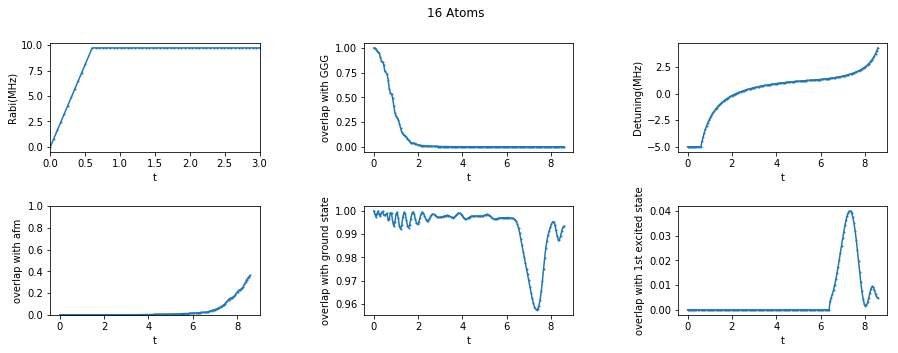

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(15,5))
fig.suptitle('16 Atoms')
#op_list1 = ['t','Detuning','rabi','overlap_g','overlap_afm','overlap_0','overlap_1','overlap_2','overlap_3']
MS = 1
LS = '-'
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,2].plot(data_16[0],data_16[1],marker='o',markersize=MS,ls=LS)
ax[0,2].set_xlabel('t')
ax[0,2].set_ylabel('Detuning(MHz)')
ax[0,0].plot(data_16[0],data_16[2],marker='o',markersize=MS,ls=LS)
ax[0,0].set_xlabel('t')
ax[0,0].set_xlim([0,3])
ax[0,0].set_ylabel('Rabi(MHz)')
ax[0,1].plot(data_16[0],data_16[3],marker='o',markersize=MS,ls=LS)
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('overlap with GGG')
ax[1,0].plot(data_16[0],data_16[4],marker='o',markersize=MS,ls=LS)
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('overlap with afm')

ax[1,1].plot(data_16[0],data_16[5],marker='o',markersize=MS,ls=LS)
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('overlap with ground state')

ax[1,2].plot(data_16[0],data_16[7],marker='o',markersize=MS,ls=LS)
ax[1,2].set_xlabel('t')
ax[1,2].set_ylabel('overlap with 1st excited state')


In [5]:
# crit_t = 5.895
data = data_16
# crit_id0 = np.argmin(abs(data[0]-crit_t))
crit_det_16 = 1.575
crit_id0_16 = np.argmin(abs(data_16[1]-crit_det_16))
print(crit_id0)

print('crit time(us) = %3f'%data_16[0,crit_id0_16])
print('crit detuning(MHz) = %3f'%data_16[1,crit_id0_16])
print('Overlap with ground state at critical point = %3f'%data_16[5,crit_id0_16])

132
crit time(us) = 6.795200
crit detuning(MHz) = 1.573551
Overlap with ground state at critical point = 0.980015


In [6]:
N_16 = 16
sign_16 = np.ones(N_16)
sign_16[0::2]=-1
sigma2_g_16 = []
sigma_c_g_16 = []
x_16 = np.arange(N_16)
sigma_c_16 = []
sigma2_16 = []
for t_id in range(len(data_16[0])):
    z_g = z0_g_16[t_id]
    zz_g = zz0_g_16[t_id].reshape(N_16,N_16)
    n_g = (1-z_g)/2
    n_g_mean = np.mean(n_g)
    sigma_g_16 = (n_g[:]-n_g_mean)*sign_16
    nn_g = (np.ones((N_16,N_16))-z_g-z_g[:,np.newaxis]+zz_g)/4
    z = z0_16[t_id]
    zz = zz0_16[t_id].reshape(N_16,N_16)
    n = (1-z)/2
    n_mean = np.mean(n)
    sigma_16 = (n[:]-n_mean)*sign_16
    nn = (np.ones((N_16,N_16))-z-z[:,np.newaxis]+zz)/4
    for i in x_16:
        temp_g = (-1)**i * (nn_g[0,i]-n_g_mean*n_g[0]-n_g_mean*n_g[i]+n_g_mean**2)
    
        sigma2_g_16.append(temp_g)
        sigma_c_g_16.append(temp_g-sigma_g_16[0]*sigma_g_16[i])
        temp =  (-1)**i * (nn[0,i]-n_mean*n[0]-n_mean*n[i]+n_mean**2)
        sigma2_16.append(temp)
        sigma_c_16.append(temp-sigma_16[0]*sigma_16[i])
sigma2_g_16 = np.array(sigma2_g_16)
sigma2_g_16 = sigma2_g_16.reshape(len(data_16[0]),N_16)
sigma2_16 = np.array(sigma2_16)
sigma2_16 = sigma2_16.reshape(len(data_16[0]),N_16)

In [7]:
def power_law(x, a, b):
    return a * x**b

Text(0.53, 1.05, 'ground state')

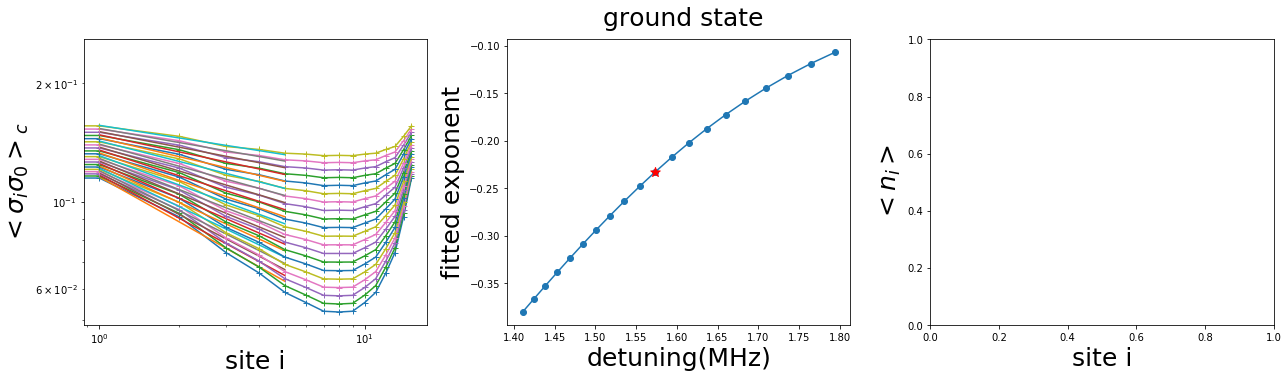

In [8]:
# plot for ground state
fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(18,5))

detuning_list_g_16 = []
exponent_list_g_16 = []
for t_id in range(crit_id0_16-10,crit_id0_16+10,1):

    ax[0].plot(x_16,sigma2_g_16[t_id],label='ground state'+str(np.round(data_16[1][t_id],4))+'MHz',marker = '+')
    detuning_list_g_16.append(data_16[1,t_id])
    fit_range = 4
    xdata = np.arange(1,fit_range)
    ydata_g = sigma2_g_16[t_id,1:fit_range]
    params_g_16, params_covariance_16 = curve_fit(power_law, xdata, ydata_g)
    xfit = np.linspace(1, fit_range+1, 100)
    yfit_g = power_law(xfit, params_g_16[0], params_g_16[1])
    exponent_list_g_16.append(params_g_16[1])
    ax[0].plot(xfit, yfit_g, '-')

    if t_id == crit_id0_16:
            ax[1].scatter(data_16[1,t_id],params_g_16[1],s=100,color = 'r',marker = '*',zorder = 2)
ax[1].plot(detuning_list_g_16,exponent_list_g_16,marker = 'o',zorder =1)
#for it,t_id in enumerate(range(crit_id0-10,crit_id0+10,1)):
# for t_id in range(crit_id0-10,crit_id0+10,2):
    #ax[0].plot(x,sigma2_g[t_id],label='ground state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+',color='C%d'%it)
   # ax[0].plot(x,sigma2_g[t_id],label='ground state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+')

 #   ax[2].scatter(np.arange(0,N),n_g)
#     detuning_list_g.append(data[1,t_id])
    
#     # define the power law function
#     fit_range = 9
#     # define the data points
#     xdata = np.arange(1,fit_range)
#     ydata_g = sigma2_g[t_id,1:fit_range]
#     # fit the power law to the data
#     params_g, params_covariance_g = curve_fit(power_law, xdata, ydata_g)
#     # evaluate the fitted power law function and plot it
#     xfit = np.linspace(1, fit_range+1, 100)
#     yfit_g = power_law(xfit, params_g[0], params_g[1])
#     exponent_list_g.append(params_g[1])
# #    ax[0].plot(xfit, yfit_g, '-',color='C%d'%it)
#     ax[0].plot(xfit, yfit_g, '-')
#     if t_id == crit_id0:
#         print(data[1,t_id],params_g[1])
#         ax[1].scatter(data[1,t_id],params_g[1],s=100,color = 'r',marker = '*',zorder = 2)
# ax[1].plot(detuning_list_g,exponent_list_g,marker = 'o',zorder =1)

ax[1].set_xlabel('detuning(MHz)',fontsize = 25)
ax[1].set_ylabel('fitted exponent',fontsize = 25)

ax[0].set_xlabel('site i',fontsize = 25)
ax[0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
#ax[2].plot(np.arange(0,N),n_g)
ax[2].set_ylim([0,1])
ax[2].set_xlabel('site i',fontsize = 25)
ax[2].set_ylabel('$<n_i>$',fontsize = 25)
ax[0].set_xscale('log')
ax[0].set_yscale('log')    
fig.tight_layout()
plt.suptitle('ground state',fontsize=25,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

1.5735509740792712 -0.2870789774727803


Text(0.53, 1.05, 'Evolved state')

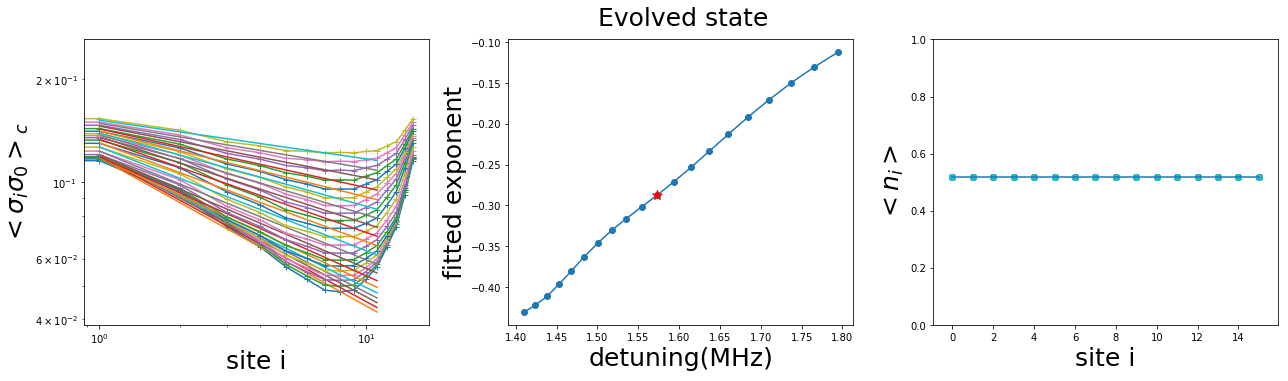

In [9]:
# plot for ground state
fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(18,5))
detuning_list = []
exponent_list = []
overlapping_list = []
N = 16
data = data_16
#for it,t_id in enumerate(range(crit_id0-10,crit_id0+10,2)):
for t_id in range(crit_id0_16-10,crit_id0_16+10,1):
    ax[0].plot(x_16,sigma2_16[t_id],label='Evolved state'+str(np.round(data_16[1][t_id],4))+'MHz',marker = '+')

    #ax[0].plot(x,sigma2[t_id],label='Evolved state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+',color='C%d'%it)
    ax[2].scatter(np.arange(0,N),n)
    detuning_list.append(data[1,t_id])
    overlapping_list.append(data[5,t_id])
    # define the power law function
    fit_range = 10
    # define the data points
    xdata = np.arange(1,fit_range)
    ydata = sigma2_16[t_id,1:fit_range]
    # fit the power law to the data
    params, params_covariance = curve_fit(power_law, xdata, ydata)
    # evaluate the fitted power law function and plot it
    xfit = np.linspace(1, fit_range+1, 100)
    yfit = power_law(xfit, params[0], params[1])
    yfit2 = power_law(xfit, params[0], -0.25)
    exponent_list.append(params[1])
   # ax[0].plot(xfit, yfit, '-',color='C%d'%it)
    ax[0].plot(xfit, yfit, '-')

    if t_id == crit_id0_16:
        print(data[1,t_id],params[1])
        ax[1].scatter(data[1,t_id],params[1],s=100,color = 'r',marker = '*',zorder = 2)
   # ax[0].plot(xfit, yfit2, 'g-',label = 'theoretical power law -0.25')
ax[1].plot(detuning_list,exponent_list,marker = 'o',zorder =1)

ax[1].set_xlabel('detuning(MHz)',fontsize = 25)
ax[1].set_ylabel('fitted exponent',fontsize = 25)

ax[0].set_xlabel('site i',fontsize = 25)
ax[0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
ax[2].plot(np.arange(0,N),n_g)
ax[2].set_ylim([0,1])
ax[2].set_xlabel('site i',fontsize = 25)
ax[2].set_ylabel('$<n_i>$',fontsize = 25)
ax[0].set_xscale('log')
ax[0].set_yscale('log')    
fig.tight_layout()
plt.suptitle('Evolved state',fontsize=25,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

In [32]:
detuning_list

[1.4104093748237054,
 1.4240926107733638,
 1.438275159115412,
 1.452984858244726,
 1.4682516551933409,
 1.4841078091341788,
 1.5005881189167198,
 1.5177301780120296,
 1.5355746607981469,
 1.5541656447746208,
 1.5735509740792712,
 1.5937826706185767,
 1.614917400249955,
 1.6370170028125024,
 1.6601490964466703,
 1.6843877686411428,
 1.709814368883536,
 1.7365184207812165,
 1.764598675201501,
 1.7941643305401944]

In [10]:
# for t_id in range(crit_id0-20, crit_id0+20,4):        
ax[0].plot(x_16,sigma2_16[crit_id0],label='evolved '+str(np.round(data[1][t_id],4))+'MHz',marker = 'o')
ax[0].set_xlabel('site i',fontsize = 25)
ax[0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
ax[1].plot(np.arange(0,N),n,marker = 'o')
ax[1].set_ylim([0,1])
ax[1].set_xlabel('site i',fontsize = 25)
ax[1].set_ylabel('$<n_i>$',fontsize = 25)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

fig.legend(loc ='upper left')
print('Crit Time 5.87us')
print('Crit Detuning '+str(np.round(data[1][crit_id0],4))+'MHz')

Crit Time 5.87us
Crit Detuning 1.5736MHz


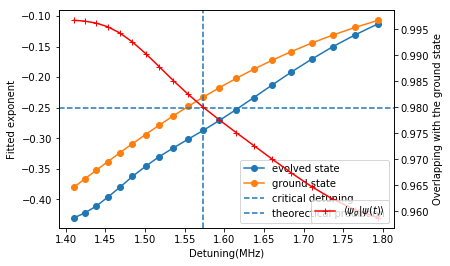

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(detuning_list,exponent_list,marker = 'o',zorder =1,label='evolved state')
ax1.plot(detuning_list_g_16,exponent_list_g_16,marker = 'o',zorder =1,label='ground state')
ax1.axvline(data[1,crit_id0_16],label = 'critical detuning',ls='--')
ax1.axhline(-0.25,label = 'theorectical prediction',ls='--')
ax1.set_xlabel('Detuning(MHz)')
ax1.set_ylabel('Fitted exponent')
ax2 = ax1.twinx()
ax2.plot(detuning_list,overlapping_list,marker = '+',color = 'r',label = '$\langle \psi_g|\psi(t)\\rangle$')
ax2.set_ylabel('Overlapping with the ground state')
ax2.legend(loc = 'lower right')
ax1.legend()

In [21]:
ove

[1.4104093748237054,
 1.4240926107733638,
 1.438275159115412,
 1.452984858244726,
 1.4682516551933409,
 1.4841078091341788,
 1.5005881189167198,
 1.5177301780120296,
 1.5355746607981469,
 1.5541656447746208,
 1.5735509740792712,
 1.5937826706185767,
 1.614917400249955,
 1.6370170028125024,
 1.6601490964466703,
 1.6843877686411428,
 1.709814368883536,
 1.7365184207812165,
 1.764598675201501,
 1.7941643305401944]

In [182]:
20*168

3360

In [204]:
sigma_c_g[t_id]

-6.378209072011032e-11